In [46]:
pwd

'/Users/alexrosheim/Desktop/UDENDATA_ACR/05-Matplotlib Homework_ACR/Pyber'

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
city = pd.read_csv('data/city_data.csv')
city.set_index('city', inplace=True)
ride = pd.read_csv('data/ride_data.csv')
ride.set_index('city', inplace=True)
df = pd.merge(ride, city, how='left', left_index=True, right_index=True)
df.head(2)

,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban


In [49]:
urban = df[df['type'] == 'Urban']
suburban = df[df['type'] == 'Suburban']
rural = df[df['type'] == 'Rural']

u_fares = urban.groupby(['city'])['fare'].mean()
u_rides = urban.groupby(['city'])['ride_id'].count()
u_drivers = urban.groupby(['city'])['driver_count'].mean()

r_fares = rural.groupby(['city'])['fare'].mean()
r_rides = rural.groupby(['city'])['ride_id'].count()
r_drivers = rural.groupby(['city'])['driver_count'].mean()

s_fares = suburban.groupby(['city'])['fare'].mean()
s_rides = suburban.groupby(['city'])['ride_id'].count()
s_drivers = suburban.groupby(['city'])['driver_count'].mean()

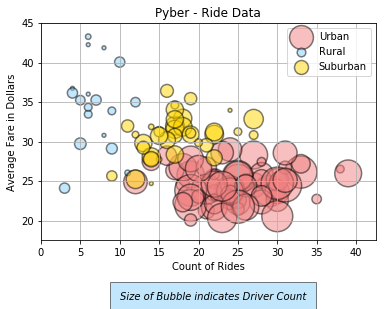

In [50]:
# Bubble Plot of Pyber - Ride Data
plt.scatter(u_rides, u_fares,s = u_drivers * 15, alpha = .5, c = "lightcoral",
            edgecolor="black", label='Urban', linewidths=1.5)

plt.scatter(r_rides, r_fares,s = r_drivers * 15, alpha = .5, c = "lightskyblue",
            edgecolor="black", label='Rural', linewidths=1.5)

plt.scatter(s_rides, s_fares,s = s_drivers * 15, alpha = .5, c = "gold",
            edgecolor="black", label='Suburban', linewidths=1.5)

plt.xlabel('Count of Rides')
plt.ylabel('Average Fare in Dollars')
plt.title('Pyber - Ride Data')
plt.legend()
plt.xlim(0, 42.5)
plt.ylim(17.5, 45)
plt.text(10, 10, 'Size of Bubble indicates Driver Count', style='italic',
        bbox={'facecolor': 'lightskyblue', 'alpha': .5, 'pad': 10})
plt.grid(True)

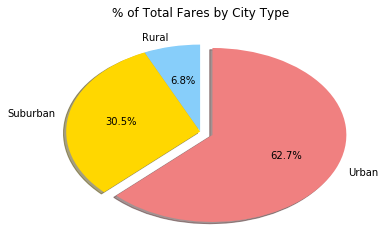

In [51]:
# % of Total Fares by City Type
t_fares = df.groupby(['type']).sum()['fare']
t_fares = t_fares / df.fare.sum()
colors = ['lightskyblue', 'gold', 'lightcoral']
explode = [0,0,0.1]
plt.pie(t_fares, labels=t_fares.index, autopct="%1.1f%%",
        colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("% of Total Fares by City Type")
plt.show()

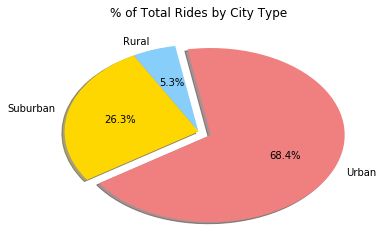

In [52]:
# % of Total Rides by City Type
t_rides = df.groupby(['type']).count()['ride_id']
t_rides = t_rides / df.ride_id.count()
colors = ['lightskyblue', 'gold', 'lightcoral']
explode = [0,0,0.1]
plt.pie(t_rides, labels=t_rides.index, autopct="%1.1f%%",
        colors=colors,explode=explode,shadow=True,startangle=100)
plt.title("% of Total Rides by City Type")
plt.show()

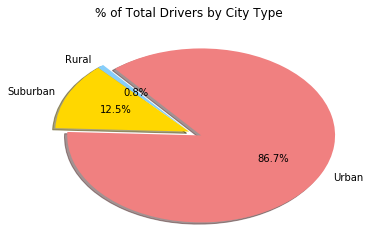

In [53]:
# % of Total Drivers by City Type
t_drivers = df.groupby(['type']).sum()['driver_count']
t_drivers = t_drivers / df.driver_count.sum()
colors = ['lightskyblue', 'gold', 'lightcoral']
explode = [0,0,0.1]
plt.pie(t_drivers, labels=t_drivers.index, autopct="%1.1f%%",
        colors=colors,explode=explode,shadow=True,startangle=130)
plt.title("% of Total Drivers by City Type")
plt.show()

**You must include a written description of three observable trends based on the data**

The avg price per ride is higher in rural areas, as rides are longer in distance 
The avg price per ride is lower in urban areas, as rides are shorter in distance

The number of rides is lower in rural areas, as rides are longer in duration
The number of rides is higher in urban areas, as rides are shorter in duration

The number of drivers is highest in urban areas, as the bulk of riders come from urban areas
The number of drivers is lowest in rural areas, as customers are more likely to have their own vehicle 